In [2]:
import pandas as pd

car = pd.read_csv("/home/leong/Desktop/EV analysis/us_car_data.csv")
car.head()

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,CAFV,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,latitude
0,Thurston,Tumwater,WA,98512,2019,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,220,0,22,242565116,PUGET SOUND ENERGY INC,53067010910,-122.913102,47.013593
1,Island,Clinton,WA,98236,2022,NISSAN,LEAF,Battery Electric Vehicle,Eligibility unknown as battery range has not b...,0,0,10,183272785,PUGET SOUND ENERGY INC,53029972000,-122.359364,47.979655
2,Snohomish,Snohomish,WA,98290,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,266,0,44,112552366,PUGET SOUND ENERGY INC,53061052502,-122.091505,47.915555
3,King,Seattle,WA,98134,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,322,0,11,6336319,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033009300,-122.329815,47.579810
4,Snohomish,Edmonds,WA,98020,2013,TESLA,MODEL S,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,208,69900,21,186212960,PUGET SOUND ENERGY INC,53061050403,-122.375070,47.808070


In [3]:
car.isnull().sum()

County                   0
City                     0
State                    0
Postal Code              0
Model Year               0
Make                     0
Model                    0
Electric Vehicle Type    0
CAFV                     0
Electric Range           0
Base MSRP                0
Legislative District     0
DOL Vehicle ID           0
Electric Utility         0
2020 Census Tract        0
Longitude                0
latitude                 0
dtype: int64

Exploration

In [4]:
#ev distribution by state
state_counts = car['State'].value_counts()
print("Electric Vehicle Distribution by State:")
state_counts

Electric Vehicle Distribution by State:


WA    134474
Name: State, dtype: int64

In [9]:
#ev distribution by model
model_counts = car['Model'].value_counts()
print("Electric Vehicle Distribution by State:", )
model_counts

Electric Vehicle Distribution by State:


MODEL 3        25752
MODEL Y        23531
LEAF           13008
MODEL S         7455
BOLT EV         5414
               ...  
GV70               2
FLYING SPUR        1
918                1
Q8                 1
S-10 PICKUP        1
Name: Model, Length: 125, dtype: int64

In [7]:
#ev distribution by City

City_counts = car['City'].value_counts()
print("Electric Vehicle Distribution by State:", )
City_counts

Electric Vehicle Distribution by State:


Seattle           23408
Bellevue           6944
Redmond            4958
Vancouver          4815
Kirkland           4196
                  ...  
Uniontown             1
Kenn                  1
Copalis Beach         1
Vantage               1
Bridgeport Bar        1
Name: City, Length: 454, dtype: int64

In [10]:
#ev distribution by Model Year
mYear_counts = car['Model Year'].value_counts()
print("Electric vehicle distribution by State:")
mYear_counts

Electric Vehicle Distribution by State:


2022    27919
2023    22209
2021    18478
2018    14314
2020    11119
2019    10555
2017     8557
2016     5676
2015     4910
2013     4589
2014     3588
2012     1655
2011      815
2024       30
2010       23
2008       19
2000        9
1999        4
2002        2
1998        1
2003        1
1997        1
Name: Model Year, dtype: int64

In [12]:
#ev distribution by CAFV
CAFV_counts = car['CAFV'].value_counts()
print("Electric vehicle distribution by State:")
CAFV_counts

Electric Vehicle Distribution by State:


Clean Alternative Fuel Vehicle Eligible                         61082
Eligibility unknown as battery range has not been researched    56618
Not eligible due to low battery range                           16774
Name: CAFV, dtype: int64

In [13]:
#analyze electric range of different electric vehicle models
electric_range_stats = car.groupby('Model')['Electric Range'].describe()
print("Electric range:")
electric_range_stats

Electric range:


,count,mean,std,min,25%,50%,75%,max
Model,,,,,,,,
330E,403.0,17.692308,3.430129,14.0,14.0,20.0,20.0,22.0
500,807.0,85.646840,1.493721,84.0,84.0,87.0,87.0,87.0
530E,383.0,15.723238,1.702065,14.0,14.0,16.0,18.0,21.0
740E,25.0,14.000000,0.000000,14.0,14.0,14.0,14.0,14.0
745E,8.0,16.000000,0.000000,16.0,16.0,16.0,16.0,16.0
...,...,...,...,...,...,...,...,...
X3,287.0,17.000000,0.000000,17.0,17.0,17.0,17.0,17.0
X5,1926.0,25.562825,7.290837,13.0,14.0,30.0,30.0,39.0
XC40,492.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


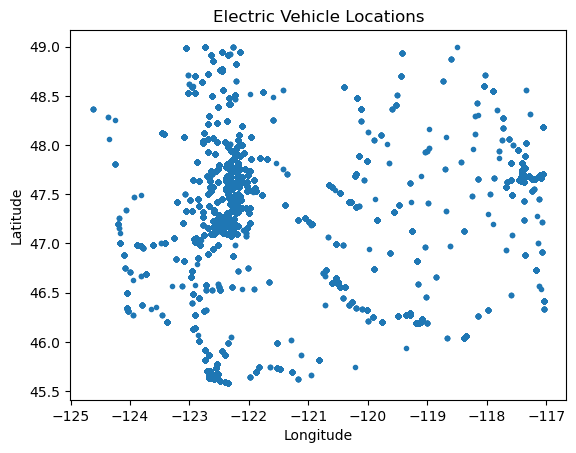

In [15]:
import matplotlib.pyplot as plt

#Plot locations of electric vehicles on a map
plt.scatter(car['Longitude'], car['latitude'], marker='.')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Electric Vehicle Locations')
plt.show()

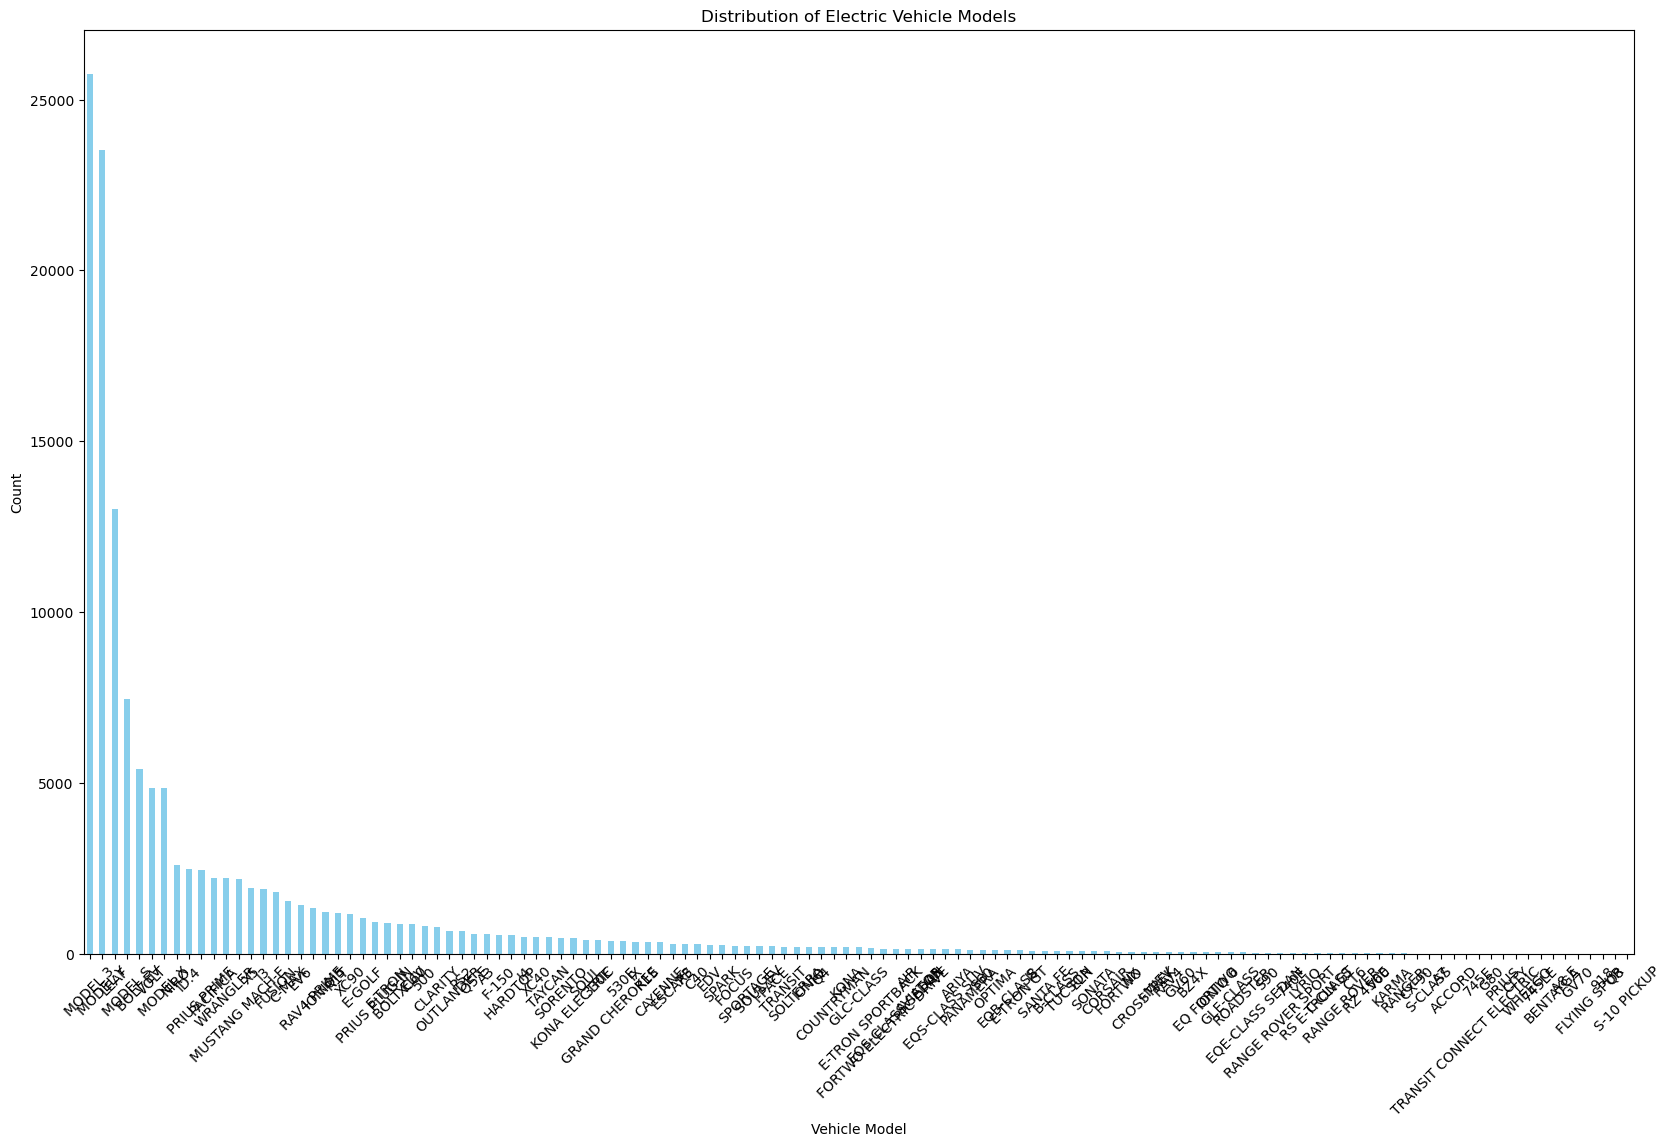

In [20]:
#vehicle model plot
plt.figure(figsize=(20, 12))
model_counts = car['Model'].value_counts()
model_counts.plot(kind='bar', rot=45, color='skyblue')
plt.title('Distribution of Electric Vehicle Models')
plt.xlabel('Vehicle Model')
plt.ylabel('Count')
plt.show()


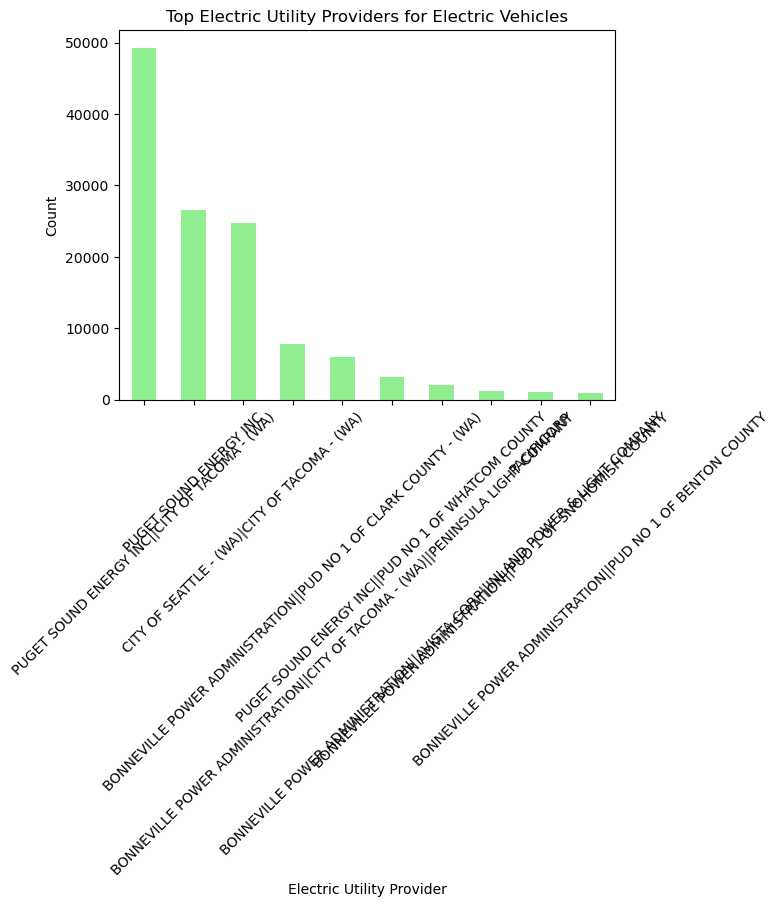

In [17]:
#Electric utility providers
utility_counts = car['Electric Utility'].value_counts().head(10)
utility_counts.plot(kind='bar', rot=45, color='lightgreen')
plt.title('Top Electric Utility Providers for Electric Vehicles')
plt.xlabel('Electric Utility Provider')
plt.ylabel('Count')
plt.show()


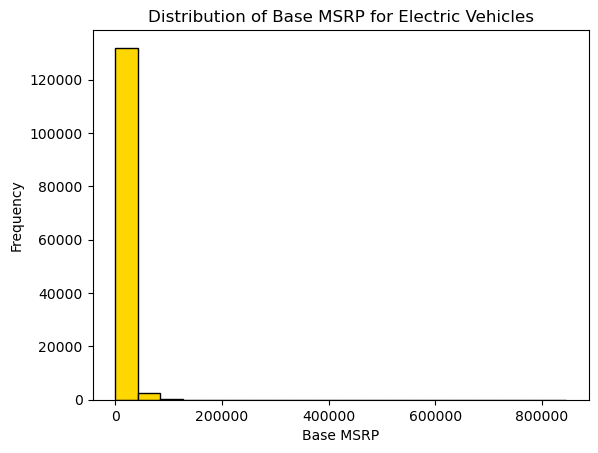

In [18]:
#Cost analysis
plt.hist(car['Base MSRP'], bins=20, color='gold', edgecolor='black')
plt.title('Distribution of Base MSRP for Electric Vehicles')
plt.xlabel('Base MSRP')
plt.ylabel('Frequency')
plt.show()
